In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_file_path = "../input/house-prices-advanced-regression-techniques/train.csv"
df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(df.shape))

Full train dataset shape is (1460, 81)


In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df.drop('Id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 1. Data Cleaning and more

### 1.1. Check Dtypes and "out of range" data according the documentation

In [5]:
print(list(set(df.dtypes.to_list())))
df['MSSubClass'] = df['MSSubClass'].astype(str).astype('O')

[dtype('O'), dtype('int64'), dtype('float64')]


In [6]:
# define a dictionary with columns and respective possible values according the documentation
des_var_opt = {
    'MSSubClass':['20','30','40','45','50','60','70','75','80','85','90',
                  '120','150','160','180','190'],
    'MSZoning':['A','C','FV','I','RH','RL','RP','RM'],
    'Street':['Grvl','Pave'],
    'Alley':['Grvl','Pave','NA'],
    'LotShape':['Reg','IR1','IR2','IR3'],
    'LandContour':['Lvl','Bnk','HLS','Low'],
    'Utilities':['AllPub','NoSewr','NoSeWa','ELO'],
    'LotConfig':['Inside','Corner','CulDSac','FR2','FR3'],
    'LandSlope':['Gtl','Mod','Sev'],
    'Neighborhood':['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor',
       'Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','Names','NoRidge','NPkVill','NridgHt',
       'NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker'],
    'Condition1':['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe'],
    'Condition2':['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe'],
    'BldgType':['1Fam','2FmCon','Duplx','TwnhsE','TwnhsI'],
    'HouseStyle':['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf','SFoyer','SLvl'],
    'RoofStyle':['Flat','Gable','Gambrel','Hip','Mansard','Shed'],
    'RoofMatl':['ClyTile','CompShg','Membran','Metal','Roll','Tar&Grv','WdShake','WdShngl'],
    'Exterior1st':['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc',
       'MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'],
    'Exterior2nd':['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc',
       'MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'],
    'MasVnrType':['BrkCmn','BrkFace','CBlock','None','Stone'],
    'ExterQual':['Ex','Gd','TA','Fa','Po'],
    'ExterCond':['Ex','Gd','TA','Fa','Po'],
    'Foundation':['BrkTil','CBlock','PConc','Slab','Stone','Wood'],
    'BsmtQual':['Ex','Gd','TA','Fa','Po','NA'],
    'BsmtCond':['Ex','Gd','TA','Fa','Po','NA'],
    'BsmtExposure':['Gd','Av','Mn','No','NA'],
    'BsmtFinType1':['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'],
    'BsmtFinType2':['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'],
    'Heating':['Floor','GasA','GasW','Grav','OthW','Wall'],
    'HeatingQC':['Ex','Gd','TA','Fa','Po'],
    'CentralAir':['N','Y'],
    'Electrical':['SBrkr','FuseA','FuseF','FuseP','Mix'],
    'KitchenQual':['Ex','Gd','TA','Fa','Po'],
    'Functional':['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],
    'FireplaceQu':['Ex','Gd','TA','Fa','Po','NA'],
    'GarageType':['2Types','Attchd','Basment','BuiltIn','CarPort','Detchd','NA'],
    'GarageFinish':['Fin','RFn','Unf','NA'],
    'GarageQual':['Ex','Gd','TA','Fa','Po','NA'],
    'GarageCond':['Ex','Gd','TA','Fa','Po','NA'],
    'PavedDrive':['Y','P','N'],
    'PoolQC':['Ex','Gd','TA','Fa','NA'],
    'Fence':['GdPrv','MnPrv','GdWo','MnWw','NA'],
    'MiscFeature':['Elev','Gar2','Othr','Shed','TenC','NA'],
    'SaleType':['WD','CWD','VWD','New','COD','Con','ConLw','ConLI','ConLD','Oth'],
    'SaleCondition':['Normal','Abnorml','AdjLand','Alloca','Family','Partial']
}

In [7]:
def check_possible_values(var_opt, data):
# checks if column values are into given values in documentation
# set 'NA' value to NaNs for those who allow NA in documentation
# var_opt: dict with column names as keys and array of possible values
# data: working dataframe
    for column in data.columns:
        if column in set(var_opt.keys()):
            given_values = set(data[column].unique())
            possible_values = set(var_opt[column])
            if ('NA' in possible_values):
                data[column] = data[column].fillna('NA')
                given_values = set(data[column].unique())
            if len(given_values-possible_values)>0:
                print(f'{column}: value/s {list(given_values-possible_values)} out of {list(possible_values)}')
                print('\n')           
    return data

# also do when importing TEST data
df1 = check_possible_values(des_var_opt, df.copy())


MSZoning: value/s ['C (all)'] out of ['A', 'C', 'RL', 'FV', 'RP', 'I', 'RH', 'RM']


Neighborhood: value/s ['NAmes'] out of ['Names', 'NoRidge', 'Blueste', 'SawyerW', 'CollgCr', 'Sawyer', 'MeadowV', 'Gilbert', 'IDOTRR', 'Timber', 'NWAmes', 'Mitchel', 'BrDale', 'NPkVill', 'Veenker', 'Crawfor', 'StoneBr', 'NridgHt', 'OldTown', 'Somerst', 'Edwards', 'ClearCr', 'BrkSide', 'Blmngtn', 'SWISU']


BldgType: value/s ['Twnhs', 'Duplex', '2fmCon'] out of ['Duplx', 'TwnhsI', '1Fam', '2FmCon', 'TwnhsE']


Exterior2nd: value/s ['CmentBd', 'Brk Cmn', 'Wd Shng'] out of ['BrkComm', 'HdBoard', 'ImStucc', 'CemntBd', 'PreCast', 'AsbShng', 'WdShing', 'AsphShn', 'Stone', 'CBlock', 'Plywood', 'Stucco', 'MetalSd', 'VinylSd', 'BrkFace', 'Wd Sdng', 'Other']


MasVnrType: value/s [nan] out of ['BrkCmn', 'None', 'Stone', 'CBlock', 'BrkFace']


Electrical: value/s [nan] out of ['SBrkr', 'FuseF', 'FuseP', 'FuseA', 'Mix']




In [8]:
# Manual corrections for out of the possible values (also do in TEST)
df1['MSZoning'] = df1['MSZoning'].replace('C (all)','C')
df1['Neighborhood'] = df1['Neighborhood'].replace('NAmes','Names')
df1['BldgType'] = df1['BldgType'].replace({'Twnhs':'TwnhsI','2fmCon':'2FmCon','Duplex':'Duplx'})
df1['Exterior2nd'] = df1['Neighborhood'].replace({'CmentBd':'CemntBd','Brk Cmn':'BrkComm','Wd Shng':'Wd Sdng'})

### 1.2. Dealing with Nulls (in numerical and cathegorical features)

In [9]:
df_des = df1.select_dtypes(include = ['O'])
df_des_na = df_des.isna().sum()
df_des_na[df_des_na>0]

MasVnrType    872
Electrical      1
dtype: int64

In [10]:
# set NA to other null values, even if is not given in doc (also do in TEST)
df1['MasVnrType'] = df1['MasVnrType'].fillna('NA')
df1['Electrical'] = df1['Electrical'].fillna('NA')


In [11]:
df_num = df1.select_dtypes(include = ['int64','float64'])
df_num_na = df_num.isna().sum()
df_num_na[df_num_na>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [12]:
# thanks to the variable properties, MasVnrArea and GarageYrBlt can be replaced by 0
# in the yearRemodAdd, "NA" values are 1950, but I prefer to put 0 in GarageYrBlt
# also do in TEST data
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(0)
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna(0)

In [13]:
# we decided that LotFrontage shoud be filled depending on a cathegorical variable
# to decide it, we compare variables with more sense, depending on the count, mean, median and standard deviation
df1[['MSZoning','LotFrontage']].groupby('MSZoning').agg(['count','mean','median','std']).sort_values(by=('LotFrontage', 'count'), ascending=False)

LotFrontage                             
               count       mean median        std
MSZoning                                         
RL               922  74.680043   72.0  23.238008
RM               199  52.366834   51.0  20.501074
FV                57  59.491228   65.0  23.041982
RH                13  58.923077   60.0  14.407530
C                 10  69.700000   60.0  23.466525

In [14]:
df1[['Neighborhood','LotFrontage']].groupby('Neighborhood').agg(['count','mean','median','std']).sort_values(by=('LotFrontage', 'count'), ascending=False)

LotFrontage                             
                   count       mean median        std
Neighborhood                                         
Names                186  76.462366   73.0  23.601905
CollgCr              126  71.682540   70.0  16.359291
OldTown              109  62.788991   60.0  18.170017
Edwards               92  68.217391   65.5  32.431780
Somerst               78  64.666667   73.5  22.562276
NridgHt               76  81.881579   88.5  24.991181
BrkSide               51  57.509804   52.0  15.528519
SawyerW               50  71.500000   66.5  14.720872
Gilbert               49  79.877551   65.0  32.748176
Sawyer                48  74.437500   71.0  14.728618
NWAmes                45  81.288889   80.0  10.614360
Crawfor               41  71.804878   74.0  19.436074
Mitchel               36  70.083333   73.0  22.100259
IDOTRR                34  62.500000   60.0  18.282712
NoRidge               33  91.878788   91.0  25.320147
Timber                30  80.133333   85.0  23.799063
SWISU                 23  58.913043   60.0  10.539592
StoneBr               20  62.700000   61.5  23.445570
BrDale                16  21.562500   21.0   1.209339
MeadowV               15  27.800000   21.0  10.107988
Blmngtn               14  47.142857   43.0   4.990100
ClearCr               13  83.461538   80.0  18.875096
NPkVill                7  32.285714   24.0  14.150551
Veenker                7  59.714286   68.0  25.597619
Blueste                2  24.000000   24.0   0.000000

In [15]:
# we have decided to fill LotFrontage with the mean of their value depending on which 'Neighborhood' is located.
# Neighborhood variable is more stable in terms of deviation and has more options with less std
# Also do in TEST set
variable_means = df1.groupby('Neighborhood')['LotFrontage'].mean()
variable_means_df = pd.DataFrame(variable_means).reset_index().rename(columns={'LotFrontage':'LotFrontageMean'})

df1 = pd.merge(df1,variable_means_df, on='Neighborhood', how='left')
df1.loc[df1['LotFrontage'].isnull(), 'LotFrontage'] = df1.loc[df1['LotFrontage'].isnull(), 'LotFrontageMean']
df1 = df1.drop('LotFrontageMean', axis=1)

In [16]:
# chack if there are no nulls, also in the target column
total_nulls = df1.isna().sum()
total_nulls[total_nulls>0]

Series([], dtype: int64)

In [17]:
df1.duplicated().sum()

0

## 2. Exploratory Data Analysis

### 2.1. Numerical variables' EDA

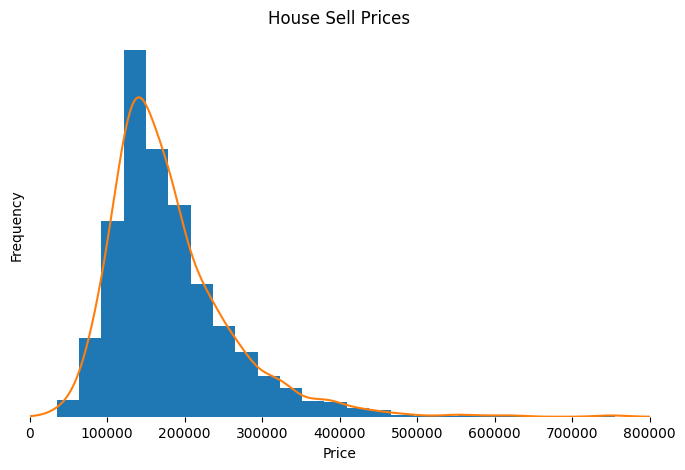

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [18]:
# Starting with target variable distribution
fig, ax = plt.subplots(figsize = (8,5))
df1['SalePrice'].plot(kind="hist", bins=25, density=True)
df1['SalePrice'].plot(kind="kde")
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")
ax.set_yticks([])
ax.set_xlim(0,0.8e6)
ax.set_title("House Sell Prices")
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()
print(df['SalePrice'].describe())

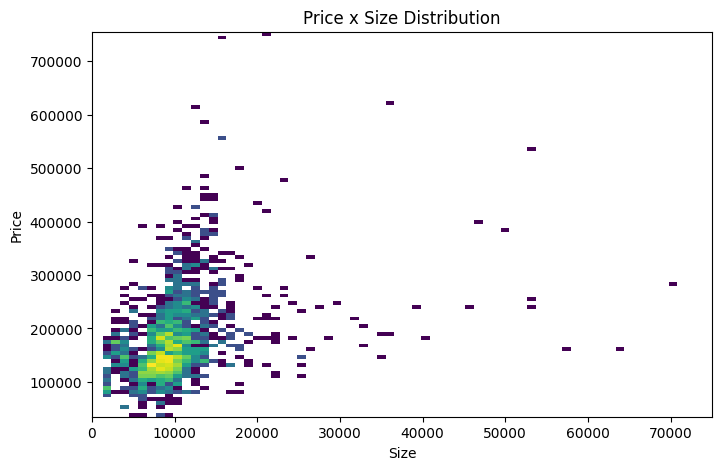

In [19]:
# target distribution by square feet area
# there is not enough with that, we have more variable such as number of garage cars, bathrooms...
fig, ax = plt.subplots(figsize = (8,5))
h = ax.hist2d(df1['LotArea'], df1['SalePrice'], bins=(200,100), norm=colors.LogNorm())
plt.title("Price x Size Distribution")
plt.xlabel("Size")
plt.ylabel("Price")
plt.xlim(0,75000)
# fig.colorbar(h[3], ax=ax)
plt.show()

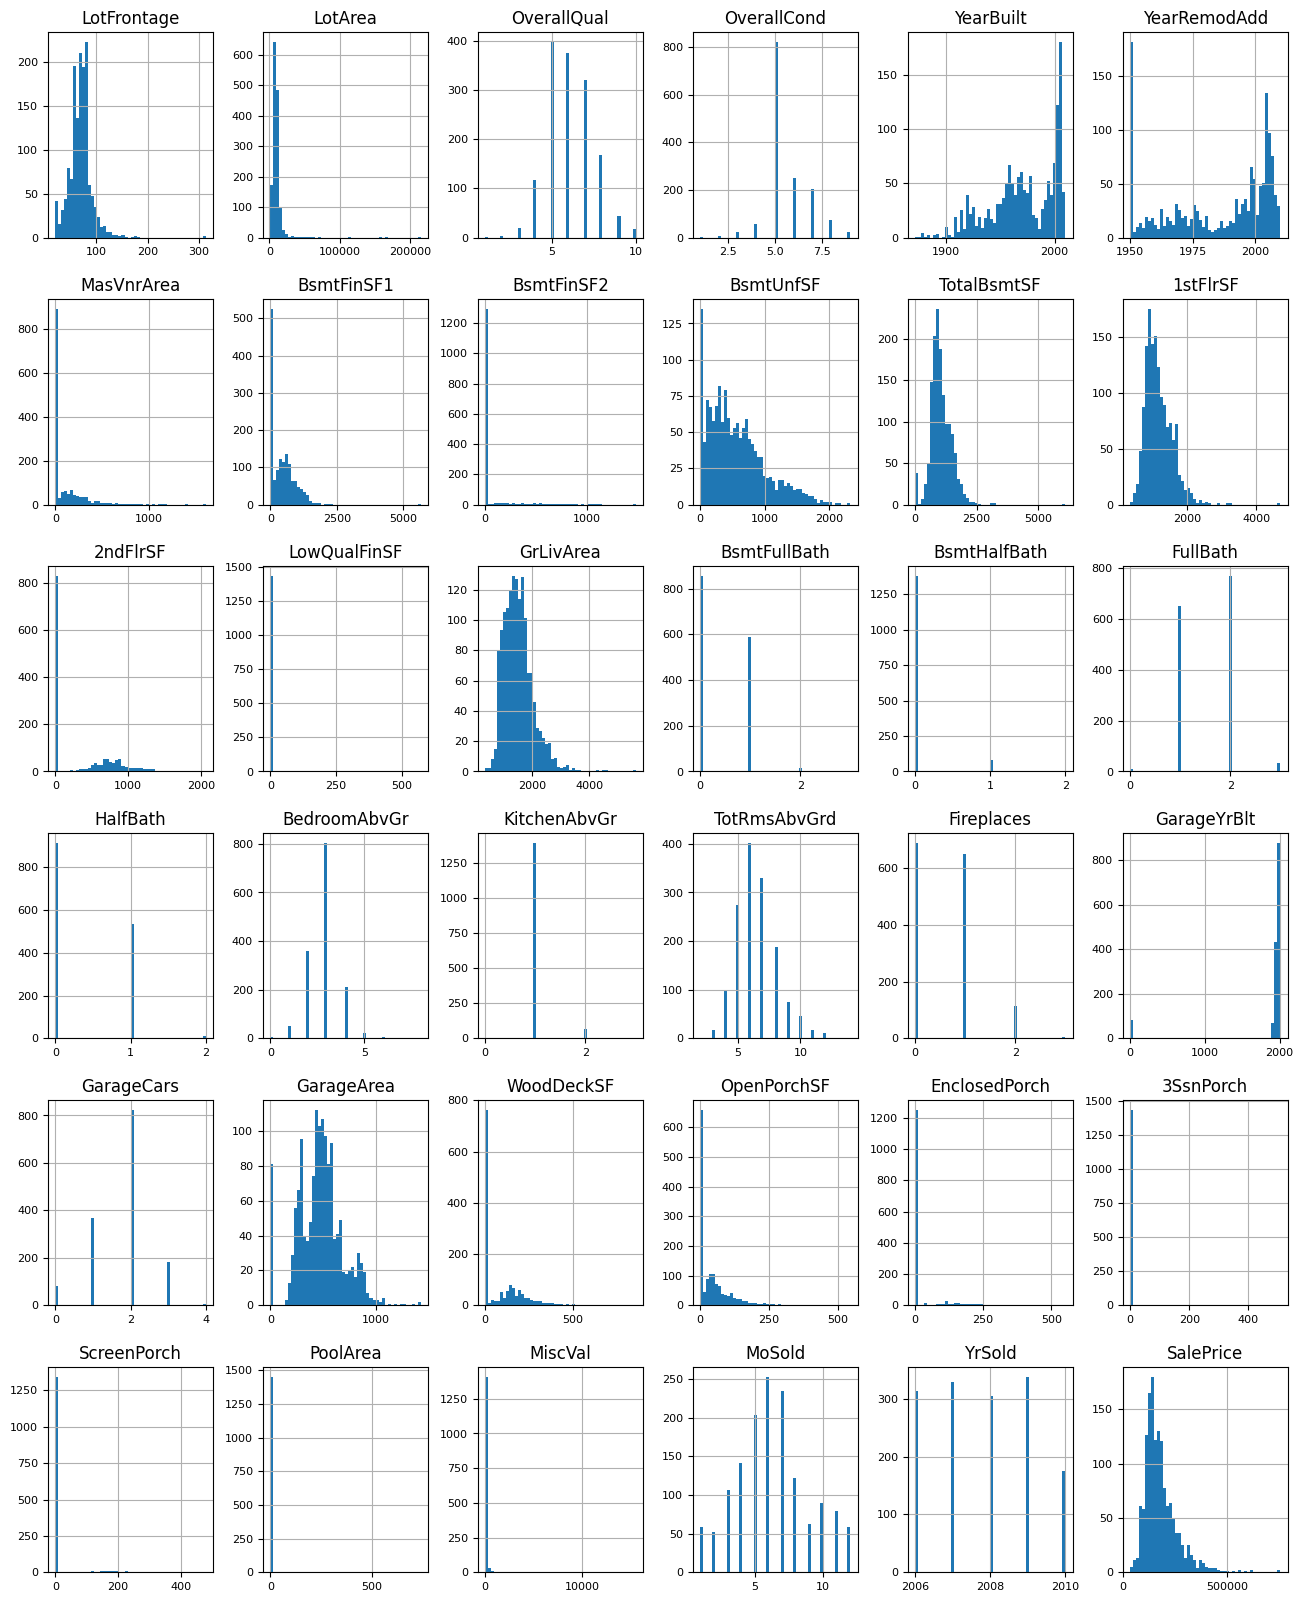

In [20]:
# histogram of all non-numerical variables is useful to see the general behabvior
df1_num = df1.select_dtypes(include = ['float64', 'int64'])
df1_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [21]:
# correlation matrix is a must to observe the numerical variables behabvior of our dataset
corr = df1_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.336997,0.236282,-0.047448,0.127706,0.086681,0.188632,0.227212,0.047569,0.116231,0.370780,0.423764,0.085955,0.030483,0.385982,0.101622,0.006766,0.190212,0.064000,0.249479,-0.009424,0.335004,0.256667,0.108968,0.279995,0.332306,0.093130,0.140304,0.002560,0.065735,0.039270,0.174520,0.010560,0.010616,0.006565,0.346962
LotArea,0.336997,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.236282,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.047448,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.127706,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.086681,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.188632,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.227212,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.047569,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,0.035070,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.116231,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.042720,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


In [22]:
# we will show a 3d histogram of the more correlated variables with the target
corr_var = corr[(corr['SalePrice']>0.5) | (corr['SalePrice']<-0.5)].index
print(f"{len(corr_var)} variables with corr coefficient > +-0.5: {', '.join(corr_var.values)}")


11 variables with corr coefficient > +-0.5: OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea, SalePrice


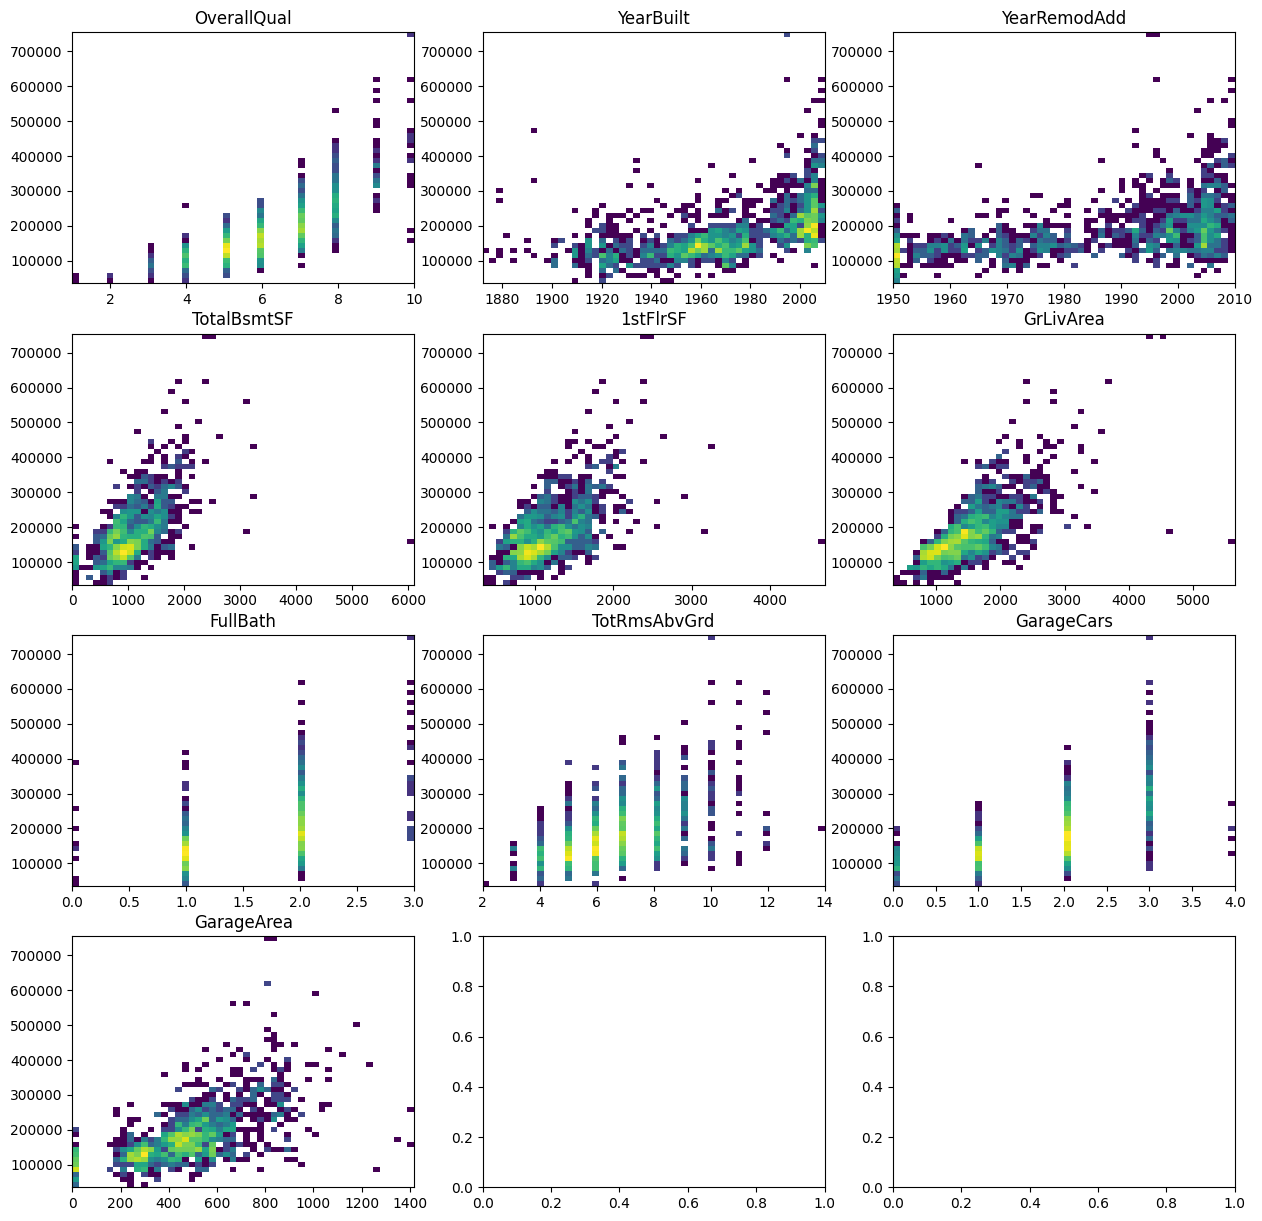

In [23]:
fig, ax = plt.subplots(4,3, figsize = (15,15))
ax = ax.ravel()
for id in range(0,len(corr_var)-1):
    ax[id].hist2d(df1[corr_var[id]], df1['SalePrice'], bins=(50,50), norm=colors.LogNorm())
    ax[id].set_title(corr_var[id])
plt.show()

### 2.2. Cathegorical variables' EDA

In [24]:
df1_des = df1.select_dtypes(include = ['O'])
# df1_des

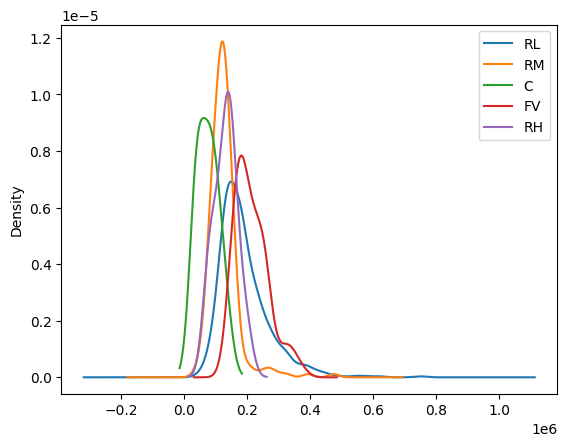

In [25]:
# showing the density function of the target depending on the descriptive variable can be very useful to study continuous target variables
# in this case, we only see once, because I consider more useful the boxplots
variable = 'MSZoning'
categories = df1[variable].fillna("NA").unique()
for category in categories:
    subset = df1[df1[variable].fillna("NA") == category]
    subset['SalePrice'].plot(kind="kde",label=category)

plt.legend()
plt.show()

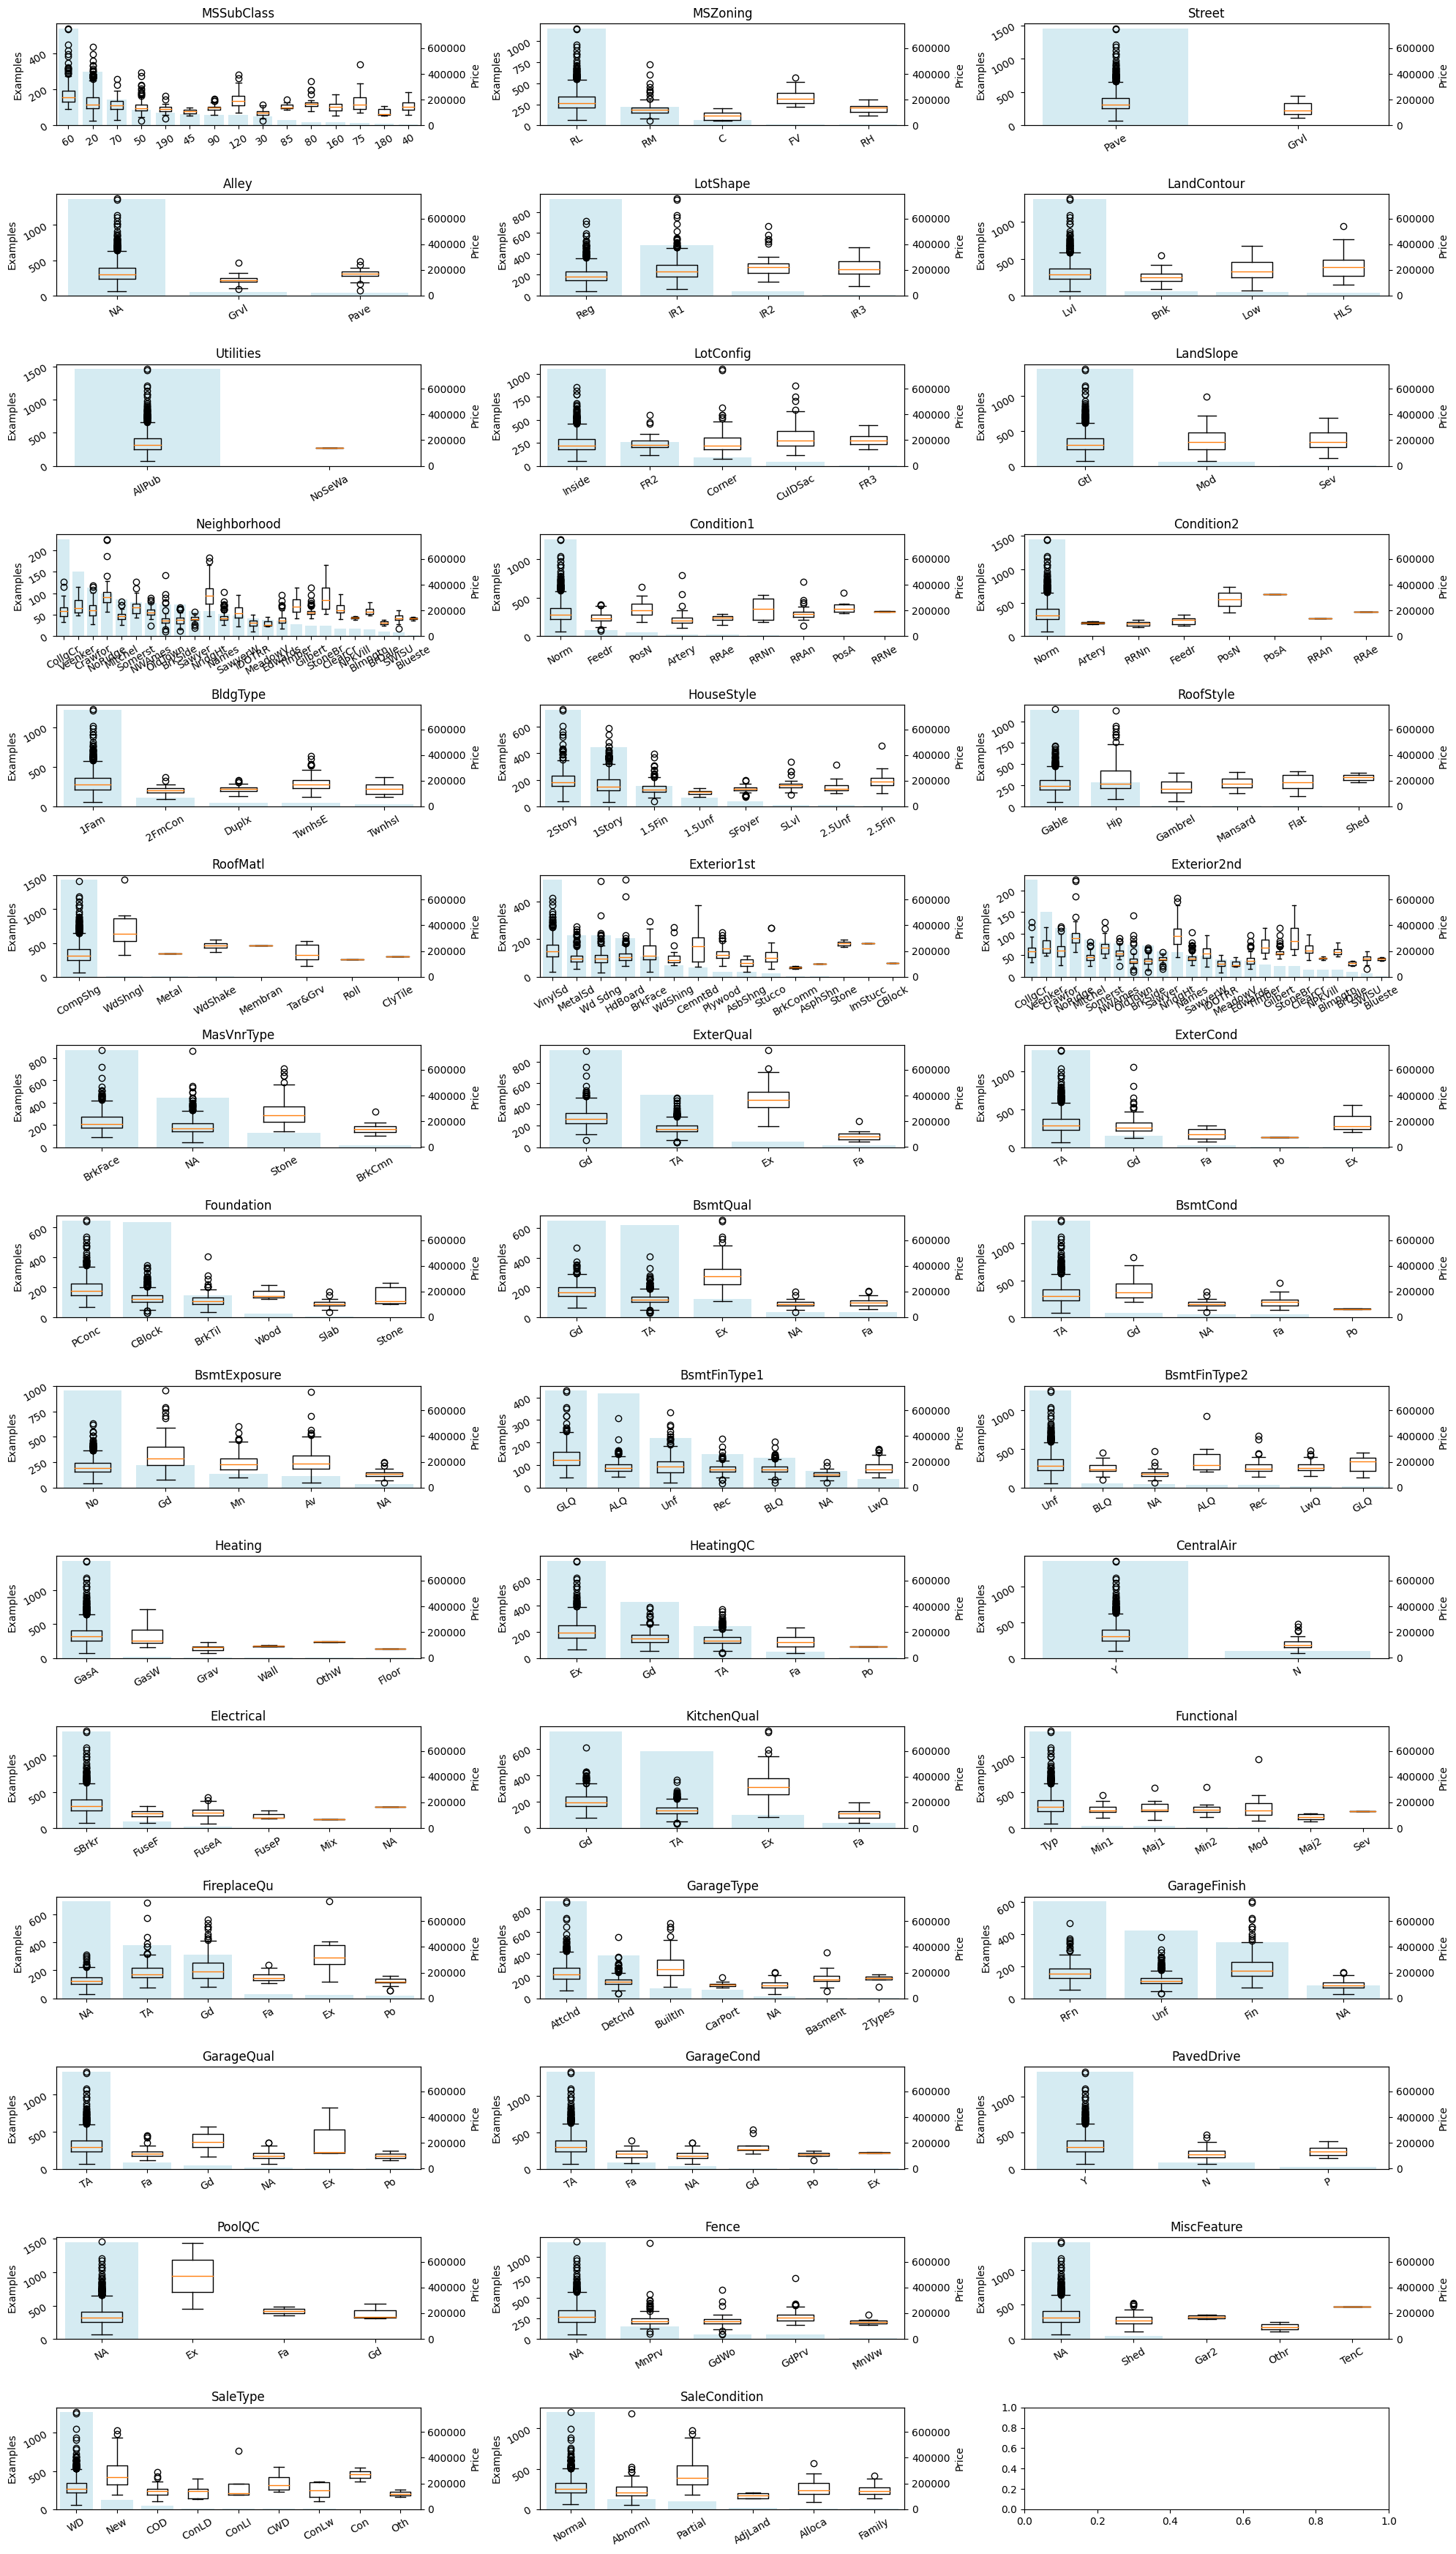

In [26]:
# boxplots of the target variable depending on the different values of each cathegorial variable are very useful
# to see correlations
des_var_list = df1_des.columns

fig, ax1 = plt.subplots(15,3, figsize=(20,35))
ax1 = ax1.ravel()

for idx, var in enumerate(des_var_list):

    dim_counts = df1[var].value_counts()
    boxplot_data = [df1[df1[var] == dim]['SalePrice'] for dim in df1[var].unique()]

    ax1[idx].bar(range(1,len(list(dim_counts.values))+1), list(dim_counts.values), color="lightblue", alpha=0.5, align="center")
    ax1[idx].set_ylabel("Examples")
    ax1[idx].set_title(var)

    ax2 = ax1[idx].twinx()
    ax2.boxplot(boxplot_data, labels=df1[var].unique())
    ax2.set_ylabel("Price")
    ax2.set_xlabel("Dimension")
    ax1[idx].tick_params(labelrotation=30)

fig.tight_layout()
plt.show()

### Outliers Removal

In [27]:
# doing EDA, you can observe graphicaly the outliers, that's why I prefer to extract them after EDA and before feature engineering
# usually, threshold value to consider outliers is 3, but the number of examples was too big compared with the total num of examples
# hence, we have decided to use 5
from scipy import stats

remove_positions = set()
for column in df1_num.columns:
    z_scores = stats.zscore(df1_num[column])
    outliers = (abs(z_scores) > 5)
    positions = set(df1[outliers].index)
    remove_positions.update(positions)


print(f'{len(remove_positions)} rows considered as outliers')

90 rows considered as outliers


In [28]:
df2 = df1.drop(remove_positions).reset_index(drop=True)
print(df1.shape, '-->', df2.shape)

(1460, 80) --> (1370, 80)


## 3. Feature Engineering

### 3.1. Studying Mutual Information and new feature relations

In [29]:
## Correlation
corr[(corr['SalePrice']>0.5) | (corr['SalePrice']<-0.5)].sort_values(by='SalePrice')['SalePrice']

YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [30]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

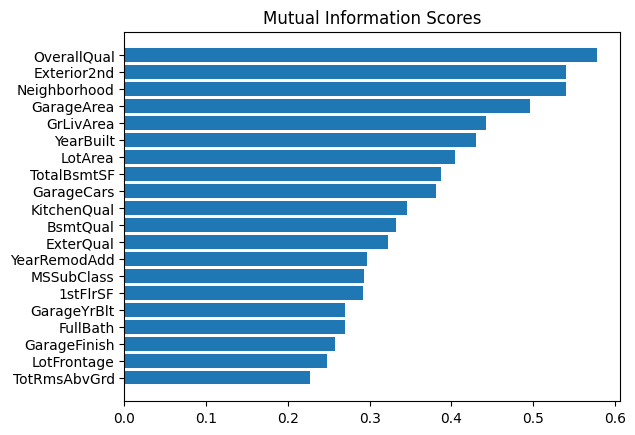

In [31]:
## Mutual Information
df2_copy = df2.copy()
df2_x = df2_copy.drop("SalePrice", axis=1)
df2_y = df2_copy.pop("SalePrice")
mi_scores = make_mi_scores(df2_x, df2_y)
plot_mi_scores(mi_scores.head(20))

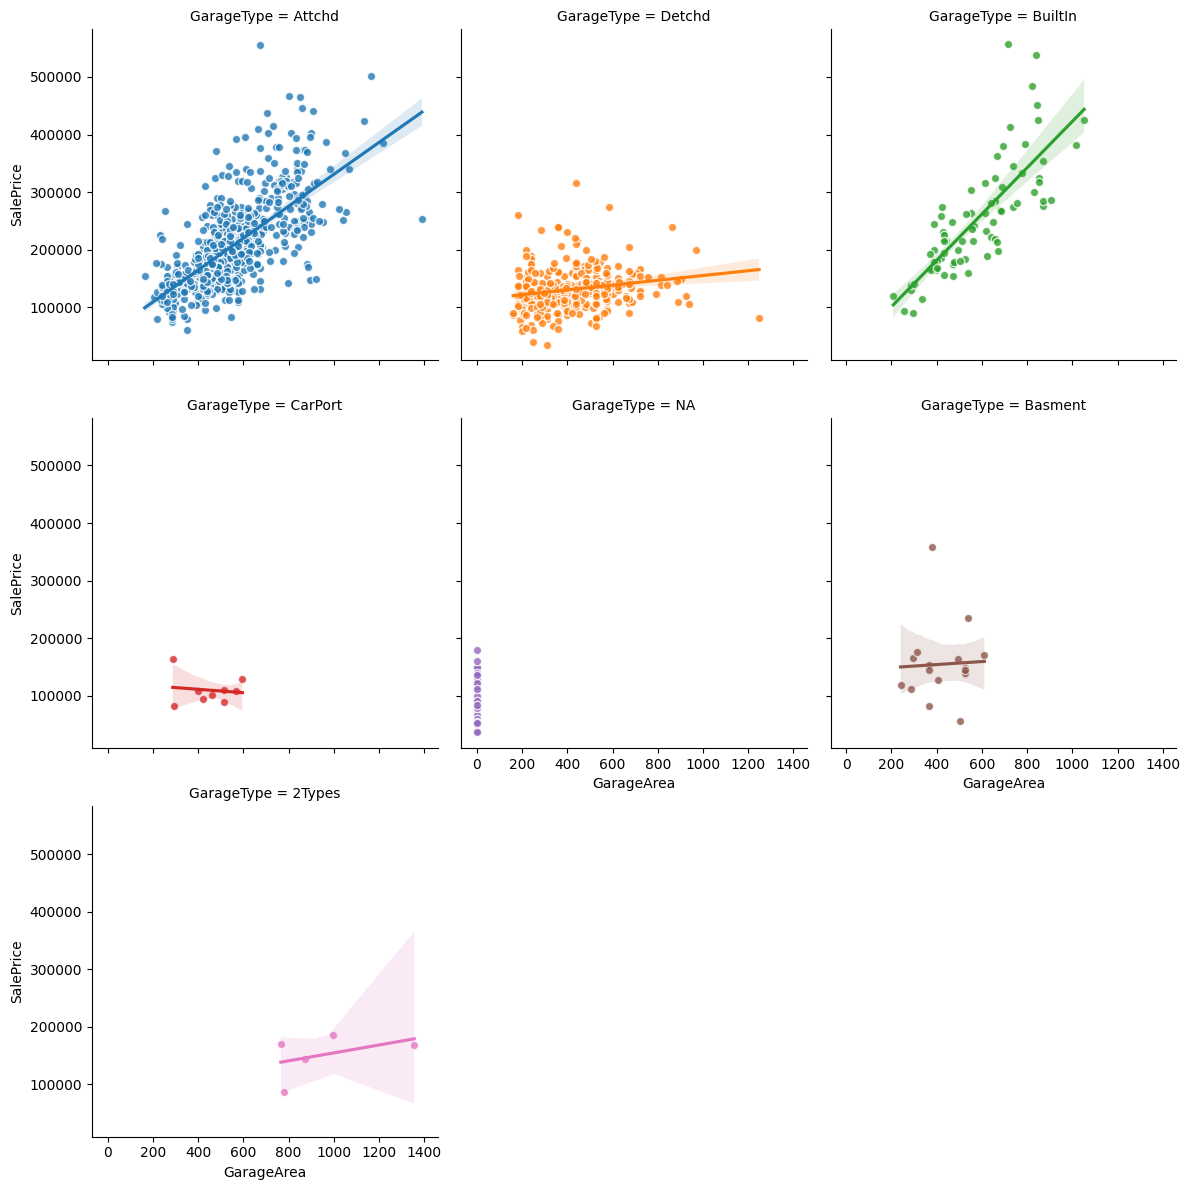

In [32]:
feature = "GarageArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="GarageType", col="GarageType",
    data=df2, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

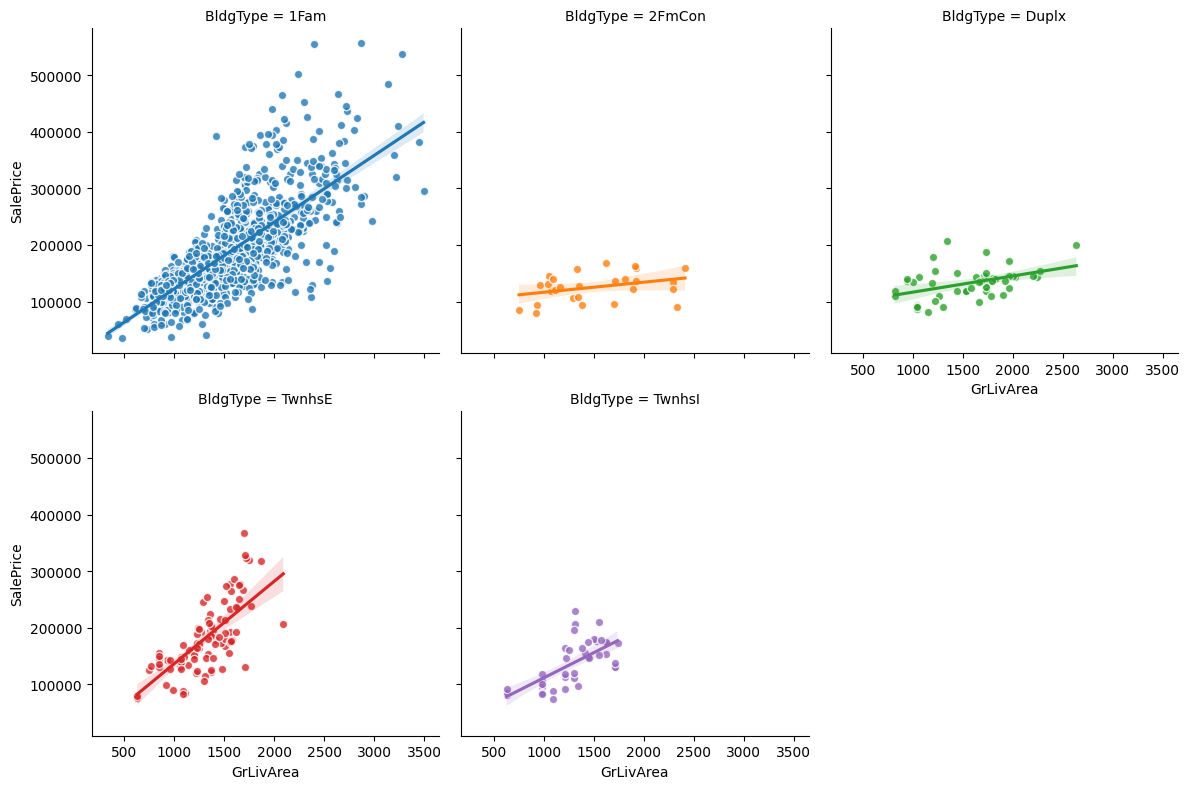

In [33]:
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df2, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

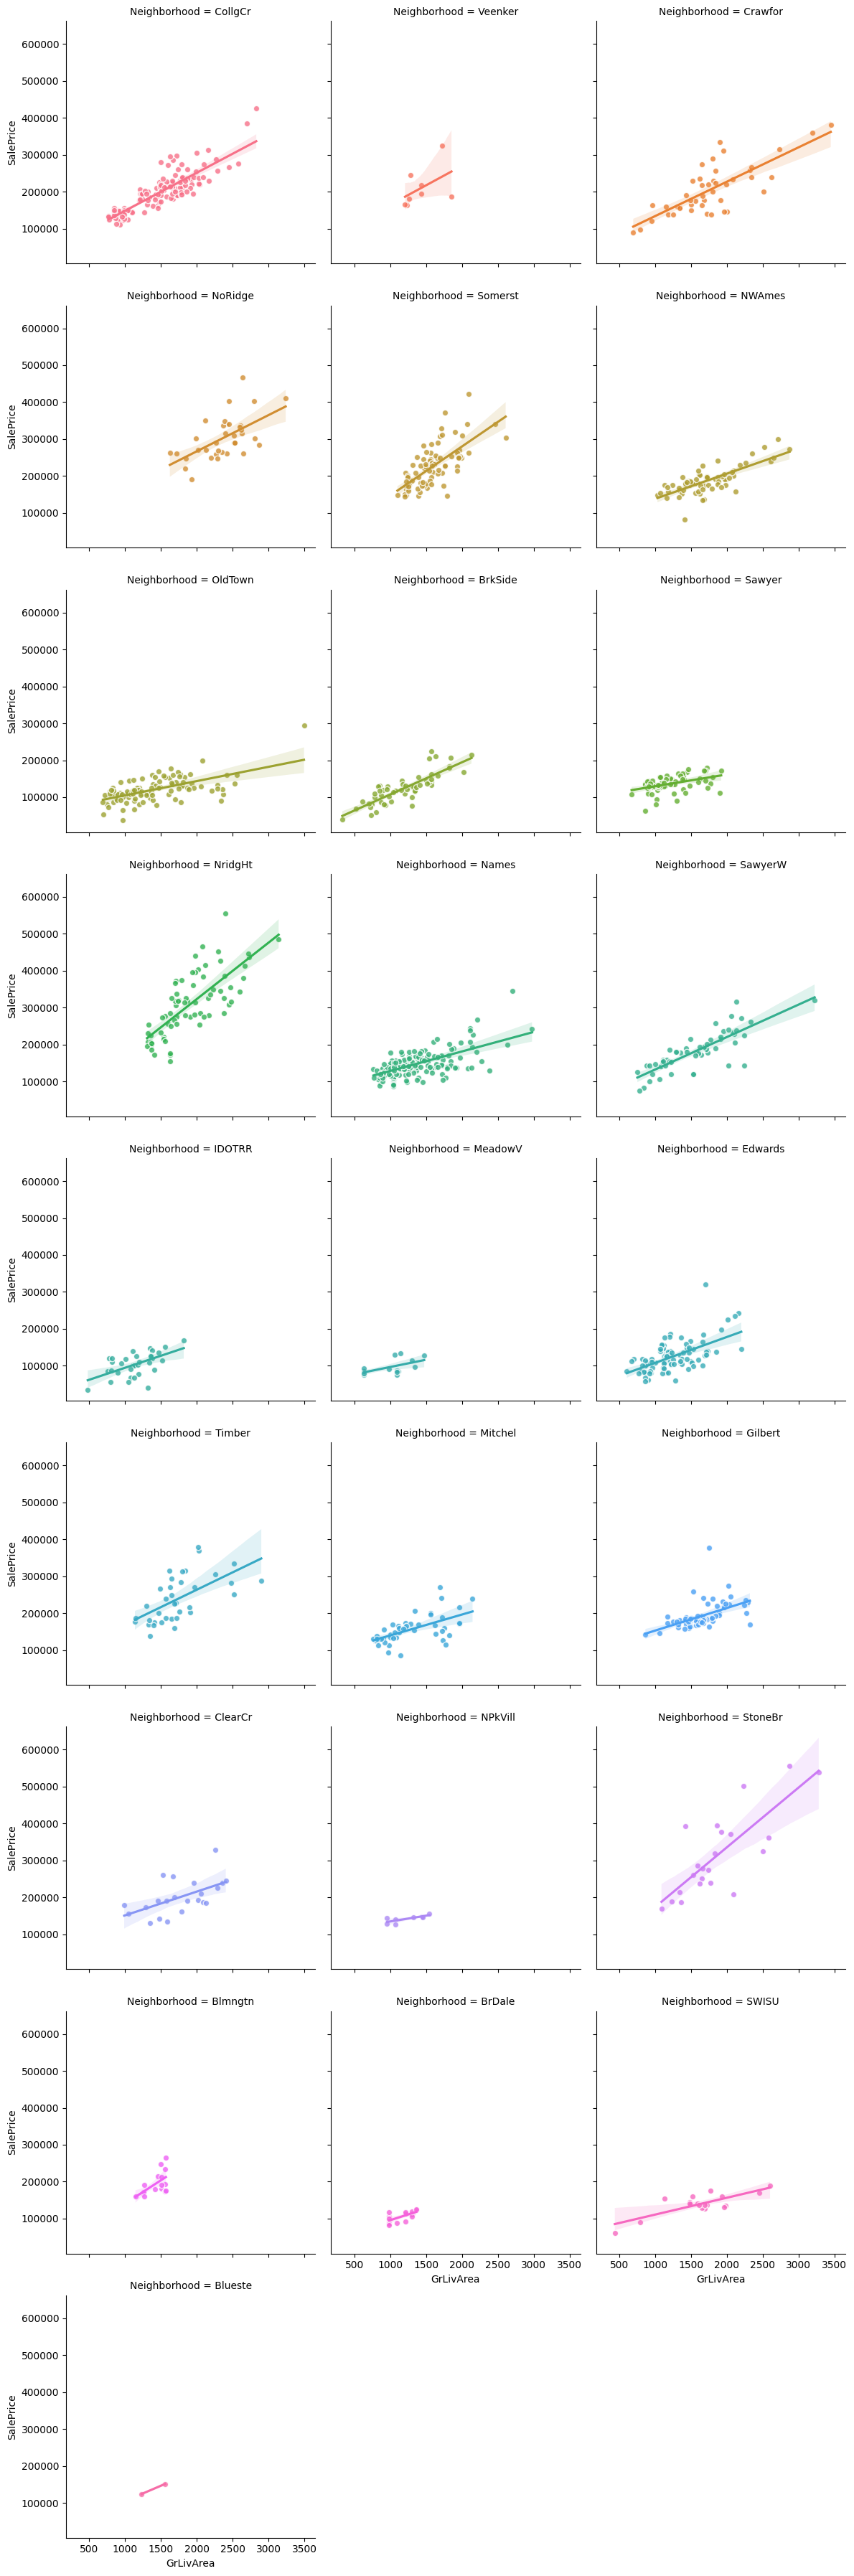

In [34]:
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="Neighborhood", col="Neighborhood",
    data=df2, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

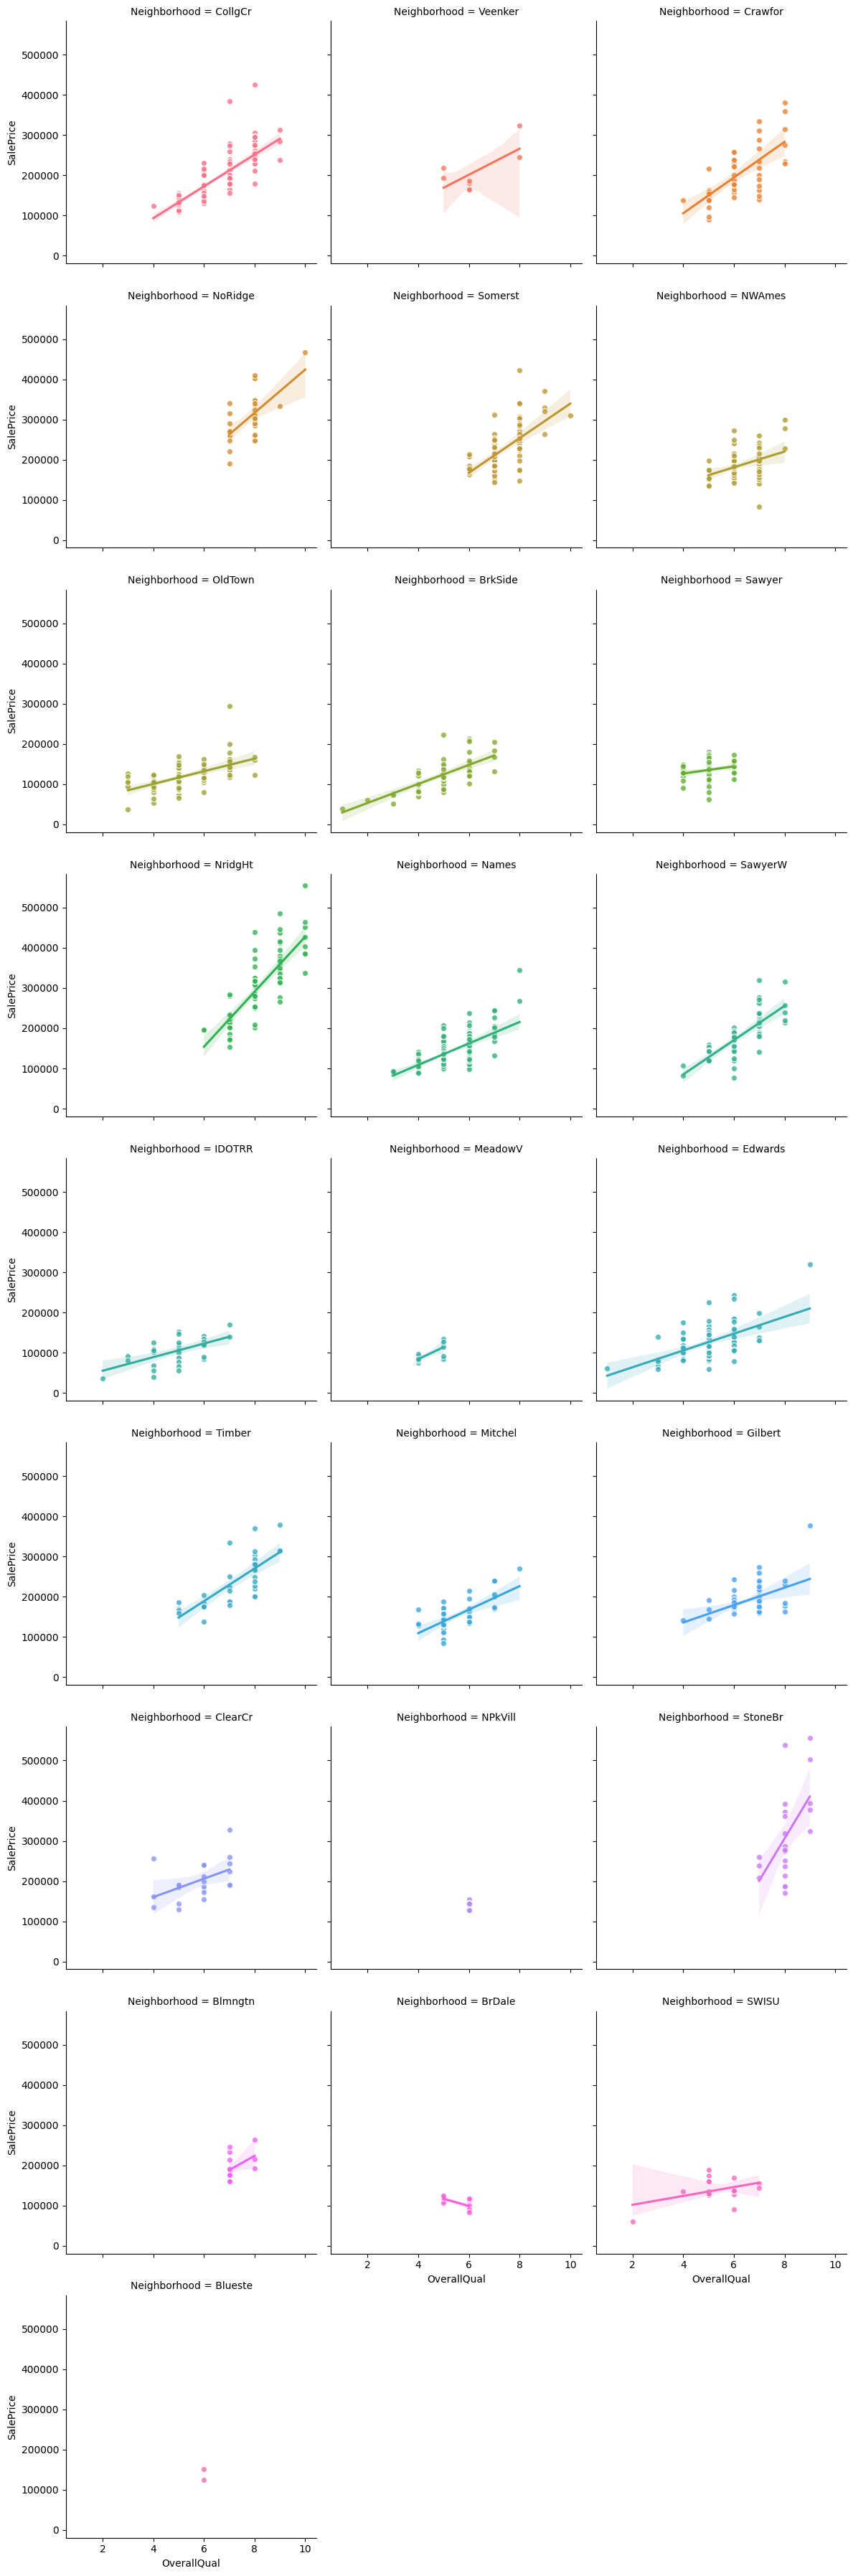

In [35]:
feature = "OverallQual"

sns.lmplot(
    x=feature, y="SalePrice", hue="Neighborhood", col="Neighborhood",
    data=df2, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

### 3.2. Creating new features

In [36]:
# everything has to be done in TEST set
def calculated_features(data):
    # features from Feature Engineering Kaggle course
    data["LivLotRatio"] = data['GrLivArea'] / data['LotArea']
    data["Spaciousness"] = data['1stFlrSF'] + data['2ndFlrSF'] / data['TotRmsAbvGrd']
    data["TotalOutsideSF"] = data['WoodDeckSF'] + data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
    # calculated personal features
    data['TotalArea'] = data['TotalBsmtSF'] + df['GrLivArea']
    data['FullBaths'] = data['BsmtFullBath'] + df['FullBath']
    data['HalfBaths'] = data['BsmtHalfBath'] + df['HalfBath']
    data['NumRooms'] = data['BedroomAbvGr'] + data['TotRmsAbvGrd']
    data['IndPorch'] = [1 if porch_area > 0 else 0 for porch_area in data["TotalOutsideSF"]]
    data['IndGarage'] = [1 if gar_area > 0 else 0 for gar_area in data["GarageArea"]]
    data['IndRemod'] = [1 if remod_year > 1950 else 0 for remod_year in data["YearRemodAdd"]]
    data['IndPool'] = [1 if pool_area > 0 else 0 for pool_area in data["PoolArea"]]
    return data, ['LivLotRatio','Spaciousness','TotalOutsideSF','TotalArea','PorchArea','FullBaths','HalfBaths','NumRooms','IndPorch','IndGarage','IndRemod','IndPool']

df3, new_features = calculated_features(df2.copy())
print(f'{len(new_features)} new features added: {", ".join(new_features)}')

12 new features added: LivLotRatio, Spaciousness, TotalOutsideSF, TotalArea, PorchArea, FullBaths, HalfBaths, NumRooms, IndPorch, IndGarage, IndRemod, IndPool


In [37]:
X_bldg_dummies = pd.get_dummies(df3.BldgType, prefix="Bldg")
X_bldg_grlivarea = X_bldg_dummies.mul(df3.GrLivArea, axis=0)
display(X_bldg_grlivarea.head())

X_gartype_dummies = pd.get_dummies(df3.GarageType, prefix="GarType")
X_gartype_gararea = X_gartype_dummies.mul(df3.GarageArea, axis=0)
display(X_gartype_gararea.head())

df3 = df3.join([X_bldg_grlivarea, X_gartype_gararea])

,Bldg_1Fam,Bldg_2FmCon,Bldg_Duplx,Bldg_TwnhsE,Bldg_TwnhsI
0,1710,0,0,0,0
1,1262,0,0,0,0
2,1786,0,0,0,0
3,1717,0,0,0,0
4,2198,0,0,0,0


,GarType_2Types,GarType_Attchd,GarType_Basment,GarType_BuiltIn,GarType_CarPort,GarType_Detchd,GarType_NA
0,0,548,0,0,0,0,0
1,0,460,0,0,0,0,0
2,0,608,0,0,0,0,0
3,0,0,0,0,0,642,0
4,0,836,0,0,0,0,0


In [38]:
df3["PorchTypes"] = df3[[
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
]].gt(0.0).sum(axis=1)

In [39]:
df3["MedNeighArea"] = df3.groupby("Neighborhood")["GrLivArea"].transform("median")
df3["MedBldgArea"] = df3.groupby("BldgType")["GrLivArea"].transform("median")
df3["MedGarArea"] = df3.groupby("GarageType")["GarageArea"].transform("median")

In [40]:
# Maybe think about cleaning some columns that are nonsense or not gige any information

## 4. Model

### 4.1. Model decision

In [41]:
df3_des = df.select_dtypes(include = ['O'])
des_columns = df3_des.columns

df4 = pd.get_dummies(df3, columns=des_columns, dtype=int)
df4.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LivLotRatio,Spaciousness,TotalOutsideSF,TotalArea,FullBaths,HalfBaths,NumRooms,IndPorch,IndGarage,IndRemod,IndPool,Bldg_1Fam,Bldg_2FmCon,Bldg_Duplx,Bldg_TwnhsE,Bldg_TwnhsI,GarType_2Types,GarType_Attchd,GarType_Basment,GarType_BuiltIn,GarType_CarPort,GarType_Detchd,GarType_NA,PorchTypes,MedNeighArea,MedBldgArea,MedGarArea,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Blmngtn,Exterior2nd_Blueste,Exterior2nd_BrDale,Exterior2nd_BrkSide,Exterior2nd_ClearCr,Exterior2nd_CollgCr,Exterior2nd_Crawfor,Exterior2nd_Edwards,Exterior2nd_Gilbert,Exterior2nd_IDOTRR,Exterior2nd_MeadowV,Exterior2nd_Mitchel,Exterior2nd_NPkVill,Exterior2nd_NWAmes,Exterior2nd_Names,Exterior2nd_NoRidge,Exterior2nd_NridgHt,Exterior2nd_OldTown,Exterior2nd_SWISU,Exterior2nd_Sawyer,Exterior2nd_SawyerW,Exterior2nd_Somerst,Exterior2nd_StoneBr,Exterior2nd_Timber,Exterior2nd_Veenker,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,H

In [42]:
# amb dummies i label mapping
from sklearn.preprocessing import LabelEncoder

df4 = df3.copy()

label_encoder = LabelEncoder()
label_mapping = {}

for column in des_columns:
    label_encoder.fit(df4[column])
    df4[column] = label_encoder.fit_transform(df4[column])
    label_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import lightgbm
import xgboost
import catboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

X = df4.drop(["SalePrice"], axis=1)
y = np.log(df4["SalePrice"]) # also apply logarithm to TEST

scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state = 1128, shuffle=True)

In [44]:
models = {
    "LightGradienBoost": lightgbm.LGBMRegressor(objective = 'root_mean_squared_error'),
    "XGBoost": xgboost.XGBRegressor(objective = 'reg:squarederror'),
    "CatBoost": catboost.CatBoostRegressor(silent=True),
    "RandomForest": RandomForestRegressor()
}


evaluation = {'Model': [], 'MSE': [], 'MAE': [], 'MAPE':[]}
predictions_error = pd.DataFrame()
feature_importances = pd.DataFrame()

for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    
    evaluation['Model'].append(model_name)
    evaluation['MSE'].append(mse)
    evaluation['MAE'].append(mae)
    evaluation['MAPE'].append(mape)
    
    predictions_error[model_name] = (predictions-y_test)/y_test
    
    model_importances = pd.DataFrame({f"{model_name}Features": X.columns, f"{model_name}Scores": model.feature_importances_}).sort_values(by=f"{model_name}Scores", ascending=False).reset_index(drop=True)
    feature_importances = pd.concat([feature_importances, model_importances], axis=1)


evaluation_df = pd.DataFrame(evaluation)
evaluation_df

,Model,MSE,MAE,MAPE
0,LightGradienBoost,0.017534,0.086094,0.007288
1,XGBoost,0.024311,0.100666,0.008545
2,CatBoost,0.017275,0.082532,0.006995
3,RandomForest,0.020571,0.091154,0.007710


The two bests models are **LightGradientBoost and CatBoost**, the second having a little bit better parameters. They are also the ones that have good feature importances, and not giving almost all the importance to a single variable, as we can see at the following table.

In [45]:
feature_importances.head(5)

,LightGradienBoostFeatures,LightGradienBoostScores,XGBoostFeatures,XGBoostScores,CatBoostFeatures,CatBoostScores,RandomForestFeatures,RandomForestScores
0,LotArea,151,OverallQual,0.443627,OverallQual,15.319519,OverallQual,0.546827
1,GarageArea,138,Bldg_1Fam,0.062433,GrLivArea,8.051766,GrLivArea,0.058721
2,GrLivArea,130,GarageCars,0.058798,Bldg_1Fam,7.728028,Bldg_1Fam,0.058107
3,BsmtFinSF1,125,MedNeighArea,0.044408,MedNeighArea,7.210628,GarageArea,0.036252
4,TotalArea,124,GrLivArea,0.044171,TotalBsmtSF,4.330800,Spaciousness,0.029834


We can see more graphically their performance plotting the **distribution of the error percentage** of every test sample.

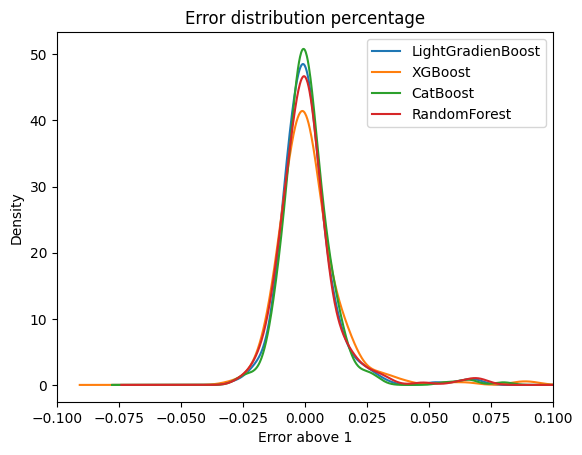

In [46]:
predictions_error['LightGradienBoost'].plot(kind="kde",label="LightGradienBoost")
predictions_error['XGBoost'].plot(kind="kde",label="XGBoost")
predictions_error['CatBoost'].plot(kind="kde",label="CatBoost")
predictions_error['RandomForest'].plot(kind="kde",label="RandomForest")
plt.xlim(-0.1,0.1)
plt.legend()
plt.title("Error distribution percentage")
plt.xlabel("Error above 1")
plt.show()

In [47]:
predictions_error.describe()

,LightGradienBoost,XGBoost,CatBoost,RandomForest
count,274.000000,274.000000,274.000000,274.000000
mean,0.000942,0.001700,0.001295,0.001089
std,0.011558,0.013658,0.011513,0.012506
min,-0.028453,-0.029984,-0.025174,-0.025295
25%,-0.005309,-0.005856,-0.004040,-0.005391
50%,-0.000053,-0.000063,-0.000139,-0.000276
75%,0.004239,0.005936,0.004751,0.004668
max,0.069195,0.091625,0.080012,0.072141


### 4.2. Model Optimization

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = catboost.CatBoostRegressor(silent=True)

param_grid = {
    'depth': [4, 5, 6],
    'learning_rate': [0.04, 0.05, 0.06 ],
    'iterations': [ 350, 400, 450],
    'l2_leaf_reg': [ 1.5 ,2, 2.5],
    'border_count': [ 118, 128,138],
    'random_strength': [ 0.9, 1 ,1.1],
    'bootstrap_type': [ 'Bernoulli'],
    'subsample': [0.6, 0.7, 0.8],
    'leaf_estimation_method': ['Gradient'],
}


grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_result = grid_search.fit(X_train, y_train.ravel())

best_estimator = grid_search.best_estimator_
y_pred_best_estimator = best_estimator.predict(X_test)

best_params = grid_result.best_params_
best_score = grid_result.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


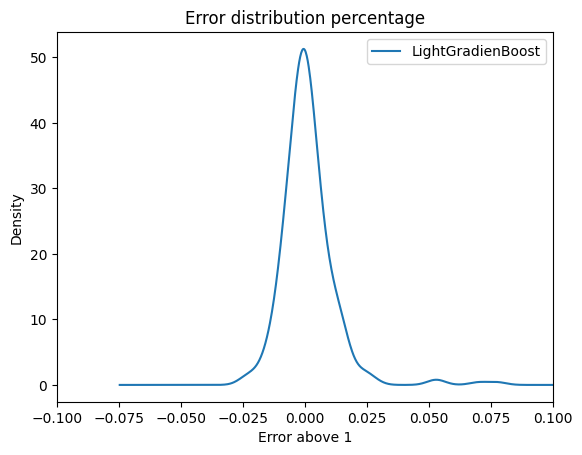

In [49]:
pred_error = (y_pred_best_estimator-y_test)/y_test
pred_error.plot(kind="kde",label="LightGradienBoost")

plt.xlim(-0.1,0.1)
plt.legend()
plt.title("Error distribution percentage")
plt.xlabel("Error above 1")
plt.show()

In [50]:
mse = mean_squared_error(y_test, y_pred_best_estimator)
mae = mean_absolute_error(y_test, y_pred_best_estimator)
mape = mean_absolute_percentage_error(y_test, y_pred_best_estimator)

print(mse,mae,mape)

0.016490545270666797 0.08174958900044388 0.006923088058284399


In [51]:
model = catboost.CatBoostRegressor(**best_params, silent=True)
model.fit(X_train, y_train)
y_pred_best_params = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_best_params)
mae = mean_absolute_error(y_test, y_pred_best_params)
mape = mean_absolute_percentage_error(y_test, y_pred_best_params)

print(mse,mae,mape)

0.016490545270666797 0.08174958900044388 0.006923088058284399


## 5. Test Data

In [52]:
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test = pd.read_csv(test_file_path)
print("Full train dataset shape is {}".format(df.shape))
test.head()

Full train dataset shape is (1460, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [53]:
test = test.drop('Id', axis=1)
# test.info()

### 5.1. Apply every transformation we have previously done in Train data

In [54]:
print(list(set(test.dtypes.to_list())))
test['MSSubClass'] = test['MSSubClass'].astype(str).astype('O')

[dtype('O'), dtype('int64'), dtype('float64')]


In [55]:
test = check_possible_values(des_var_opt, test.copy())

MSZoning: value/s ['C (all)', nan] out of ['A', 'C', 'RL', 'FV', 'RP', 'I', 'RH', 'RM']


Utilities: value/s [nan] out of ['ELO', 'AllPub', 'NoSewr', 'NoSeWa']


Neighborhood: value/s ['NAmes'] out of ['Names', 'NoRidge', 'Blueste', 'SawyerW', 'CollgCr', 'Sawyer', 'MeadowV', 'Gilbert', 'IDOTRR', 'Timber', 'NWAmes', 'Mitchel', 'BrDale', 'NPkVill', 'Veenker', 'Crawfor', 'StoneBr', 'NridgHt', 'OldTown', 'Somerst', 'Edwards', 'ClearCr', 'BrkSide', 'Blmngtn', 'SWISU']


BldgType: value/s ['Twnhs', 'Duplex', '2fmCon'] out of ['Duplx', 'TwnhsI', '1Fam', '2FmCon', 'TwnhsE']


Exterior1st: value/s [nan] out of ['BrkComm', 'HdBoard', 'ImStucc', 'CemntBd', 'PreCast', 'AsbShng', 'WdShing', 'AsphShn', 'Stone', 'CBlock', 'Plywood', 'Stucco', 'MetalSd', 'VinylSd', 'BrkFace', 'Wd Sdng', 'Other']


Exterior2nd: value/s ['CmentBd', 'Brk Cmn', nan, 'Wd Shng'] out of ['BrkComm', 'HdBoard', 'ImStucc', 'CemntBd', 'PreCast', 'AsbShng', 'WdShing', 'AsphShn', 'Stone', 'CBlock', 'Plywood', 'Stucco', 'MetalSd', 

In [56]:
test['MSZoning'] = test['MSZoning'].replace('C (all)','C')
test['Neighborhood'] = test['Neighborhood'].replace('NAmes','Names')
test['BldgType'] = test['BldgType'].replace({'Twnhs':'TwnhsI','2fmCon':'2FmCon','Duplex':'Duplx'})
test['Exterior2nd'] = test['Neighborhood'].replace({'CmentBd':'CemntBd','Brk Cmn':'BrkComm','Wd Shng':'Wd Sdng'})

In [57]:
test['MasVnrType'] = test['MasVnrType'].fillna('NA')
test['Electrical'] = test['Electrical'].fillna('NA')

test['MasVnrArea'] = test['MasVnrArea'].fillna(0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

In [58]:
test = pd.merge(test,variable_means_df, on='Neighborhood', how='left')
test.loc[test['LotFrontage'].isnull(), 'LotFrontage'] = test.loc[test['LotFrontage'].isnull(), 'LotFrontageMean']
test = test.drop('LotFrontageMean', axis=1)

In [59]:
nans = test.isna().sum()
nans[nans>0]

MSZoning        4
Utilities       2
Exterior1st     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [60]:
print(f"{test.isnull().sum().sum()} nulls remaining and {test.duplicated().sum()} duplicated rows")

21 nulls remaining and 0 duplicated rows


### 5.2. Apply new features created

In [61]:
test, new_features = calculated_features(test.copy())
print(f'{len(new_features)} new features added: {", ".join(new_features)}')

12 new features added: LivLotRatio, Spaciousness, TotalOutsideSF, TotalArea, PorchArea, FullBaths, HalfBaths, NumRooms, IndPorch, IndGarage, IndRemod, IndPool


In [62]:
X_bldg_dummies = pd.get_dummies(test.BldgType, prefix="Bldg")
X_bldg_grlivarea = X_bldg_dummies.mul(test.GrLivArea, axis=0)
# display(X_bldg_grlivarea.head())

X_gartype_dummies = pd.get_dummies(test.GarageType, prefix="GarType")
X_gartype_gararea = X_gartype_dummies.mul(test.GarageArea, axis=0)
# display(X_gartype_gararea.head())

test = test.join([X_bldg_grlivarea, X_gartype_gararea])

In [63]:
test["PorchTypes"] = test[[
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
]].gt(0.0).sum(axis=1)
test["MedNeighArea"] = test.groupby("Neighborhood")["GrLivArea"].transform("median")
test["MedBldgArea"] = test.groupby("BldgType")["GrLivArea"].transform("median")
test["MedGarArea"] = test.groupby("GarageType")["GarageArea"].transform("median")

### 5.3. Apply mappings and scale

In [64]:
for column, mapping in label_mapping.items():
    if column in test.columns:
        test[column] = test[column].map(mapping)
        
scaled_test = scaler_X.transform(test.copy())

### 5.4. Final Predictions

In [65]:
test_predictions = model.predict(scaled_test)

test_predictions = np.exp(test_predictions)
indexes = [i for i in range(1461,1461+len(test_predictions))]

test_predictions_df = pd.DataFrame({"Id":indexes, "SalePrice":test_predictions})

In [66]:
test_predictions_df.to_csv('sample_submission.csv',index=False)

In [67]:
test_predictions_df

,Id,SalePrice
0,1461,126554.533845
1,1462,154000.541364
2,1463,185171.112056
3,1464,197332.859778
4,1465,202311.880442
...,...,...
1454,2915,82795.852968
1455,2916,85158.748165
1456,2917,154438.548709
1457,2918,118562.574475
